# Step:1 Reading dataset

In [1]:
import pandas as pd 

In [2]:
ibm=pd.read_csv('IBM Attrition Data.csv')
ibm.head()

Age Attrition              Department  DistanceFromHome  Education  \
0   41       Yes                   Sales                 1          2   
1   49        No  Research & Development                 8          1   
2   37       Yes  Research & Development                 2          2   
3   33        No  Research & Development                 3          4   
4   27        No  Research & Development                 2          1   

  EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
0  Life Sciences                        2                4        Single   
1  Life Sciences                        3                2       Married   
2          Other                        4                3        Single   
3  Life Sciences                        4                3       Married   
4        Medical                        1                2       Married   

   MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0           5993                   8                1               6  
1           5130                   1                3              10  
2           2090                   6                3               0  
3           2909                   1                3               8  
4           3468                   9                3               2

In [3]:
ibm.tail()

Age Attrition              Department  DistanceFromHome  Education  \
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisfaction MaritalStatus  \
1465        Medical                        3                4       Married   
1466        Medical                        4                1       Married   
1467  Life Sciences                        2                2       Married   
1468        Medical                        4                2       Married   
1469        Medical                        2                3       Married   

      MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
1465           2571                   4                3               5  
1466           9991                   4                3               7  
1467           6142                   1                3               6  
1468           5390                   2                2               9  
1469           4404                   2                4               4

## Step:2 Find the age distribution of employees in IBM

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
ibm['Age'].head()

0    41
1    49
2    37
3    33
4    27
Name: Age, dtype: int64

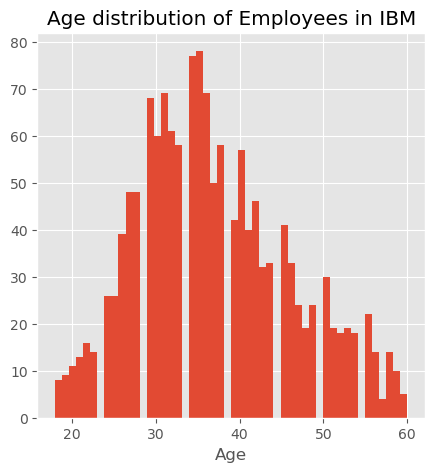

In [6]:
style.use('ggplot')
plt.figure(figsize=(5,5))
plt.title('Age distribution of Employees in IBM')
plt.xlabel("Age")
ibm['Age'].hist(bins=50)
plt.show()

## Step:3 Explore attrition by age

In [7]:
ibm['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

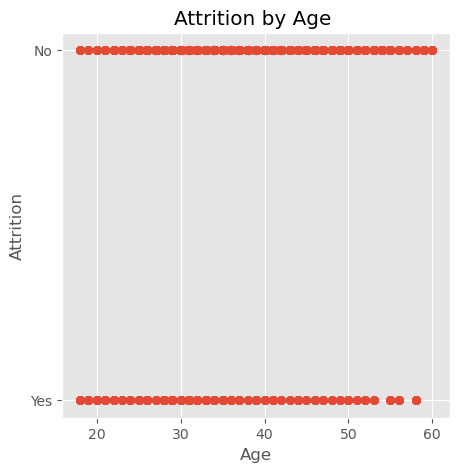

In [8]:
style.use('ggplot')
plt.figure(figsize=(5,5))
plt.title("Attrition by Age ")
plt.scatter(ibm.Age,ibm.Attrition)
plt.ylabel('Attrition')
plt.xlabel('Age')
plt.show()

## Step:4 Find out the distribution of employees by the education field

In [9]:
ibm['EducationField'].head()

0    Life Sciences
1    Life Sciences
2            Other
3    Life Sciences
4          Medical
Name: EducationField, dtype: object

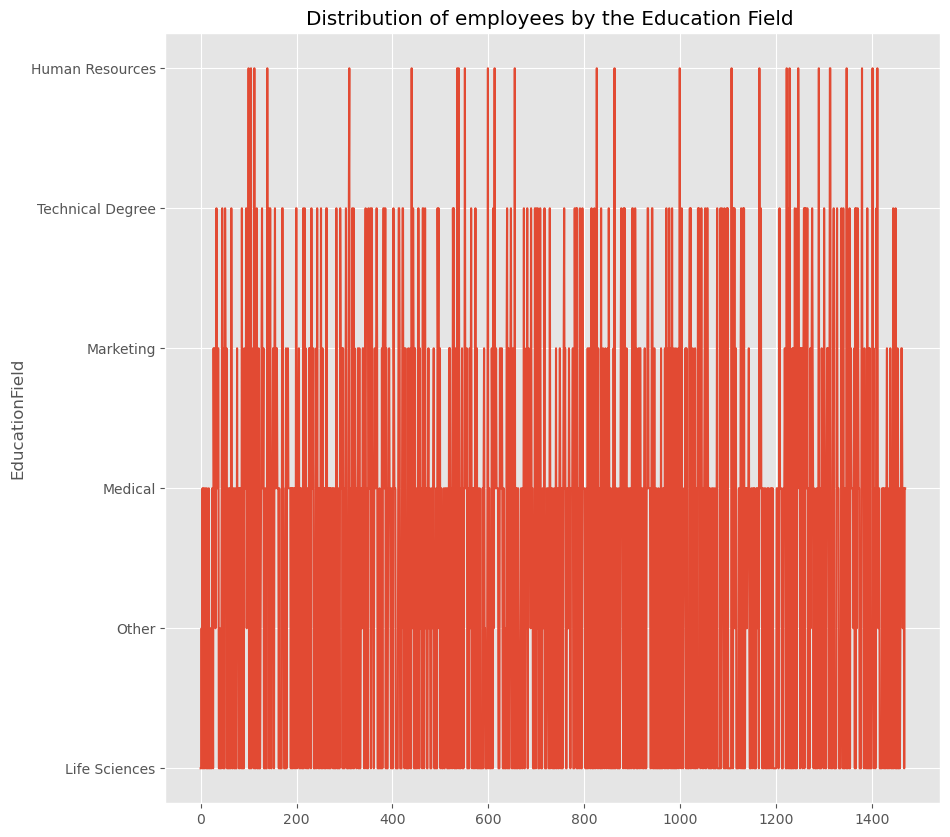

In [10]:
style.use('ggplot')
plt.figure(figsize=(10,10))
plt.title("Distribution of employees by the Education Field ")
plt.plot(ibm.EducationField)
plt.ylabel('EducationField')
plt.show()

## Step:5 Give a bar chart for the number of married and unmarried employees

In [11]:
ibm['MaritalStatus'].head()

0     Single
1    Married
2     Single
3    Married
4    Married
Name: MaritalStatus, dtype: object

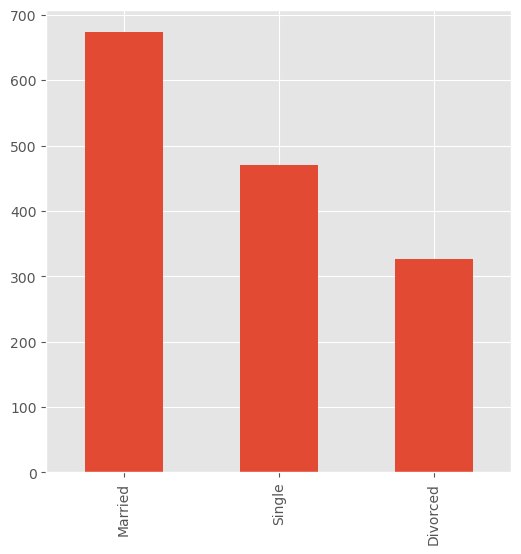

In [12]:
plt.figure(figsize=(6,6))
ibm.MaritalStatus.value_counts().plot(kind='bar')
plt.show()

## Step:6 Build up a logistic regression model to predict which employees are likely to attrite

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [14]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [15]:
ibm['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
Attrition={'Yes':1,'No':0,}
ibm.Attrition=[Attrition[i] for i in ibm.Attrition]

In [17]:
ibm['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [18]:
ibm['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [19]:
Department={'Sales':1,'Research & Development':2,'Human Resources':3}
ibm.Department=[Department[i] for i in ibm.Department]

In [20]:
ibm['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [21]:
ibm['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [22]:
EducationField={'Life Sciences':1,'Medical':2,'Marketing':3,'Technical Degree':4,'Human Resources':5,'Other':6}
ibm.EducationField=[EducationField[i] for i in ibm.EducationField]

In [23]:
ibm['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [24]:
ibm['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [25]:
MaritalStatus={'Married':1,'Single':2,'Divorced':3}
ibm.MaritalStatus=[MaritalStatus[i] for i in ibm.MaritalStatus]

In [26]:
ibm['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [27]:
ibm.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [28]:
features=['Age','Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany']

In [29]:
x=ibm[features]
x.head()

Age  Department  DistanceFromHome  Education  EducationField  \
0   41           1                 1          2               1   
1   49           2                 8          1               1   
2   37           2                 2          2               6   
3   33           2                 3          4               1   
4   27           2                 2          1               2   

   EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0                        2                4              2           5993   
1                        3                2              1           5130   
2                        4                3              2           2090   
3                        4                3              1           2909   
4                        1                2              1           3468   

   NumCompaniesWorked  WorkLifeBalance  YearsAtCompany  
0                   8                1               6  
1                   1                3              10  
2                   6                3               0  
3                   1                3               8  
4                   9                3               2

In [30]:
y=ibm.Attrition
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
logreg=LogisticRegression()

In [33]:
logreg.fit(x_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
y_pred.shape

(368,)

In [36]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
557     0
831     1
686     0
969     0
1395    1
Name: Attrition, Length: 368, dtype: int64

In [37]:
from sklearn import metrics

In [38]:
cmatrix=metrics.confusion_matrix(y_test, y_pred)

In [39]:
cmatrix=metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix, 
                                       display_labels=[False, True])

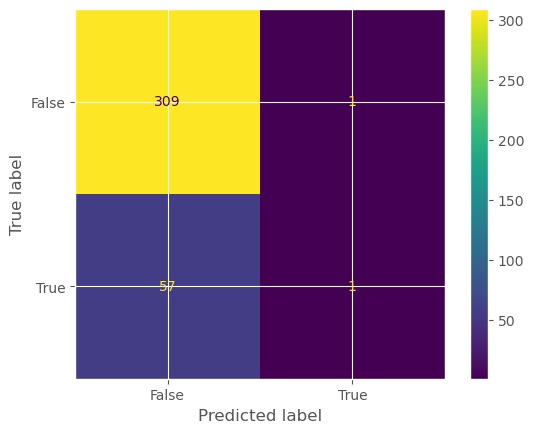

In [40]:
cmatrix.plot()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.842391304347826